In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
data_path = '/kaggle/input/adni-cn'

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
import torch
import torchvision
from torchvision import datasets,transforms, models
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable 
import time
%matplotlib inline
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import cv2
import torch.nn as nn

In [11]:
df = pd.read_csv('/kaggle/input/adni-cn/ADNIMERGE.csv')
df

/tmp/ipykernel_28/2243913262.py:1: DtypeWarning: Columns (19,20,21,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/adni-cn/ADNIMERGE.csv')


,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-09-08,CN,74.3,Male,...,NaN,1.336150,NaN,NaN,NaN,0.000000,0.00000,0,0,2022-10-26 04:58:48.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-09-12,AD,81.3,Male,...,22.83,1.108600,NaN,NaN,NaN,0.000000,0.00000,0,0,2022-10-26 04:58:48.0
2,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-03-13,AD,81.3,Male,...,22.83,1.108600,NaN,NaN,NaN,0.498289,5.96721,6,6,2022-10-26 04:58:48.0
3,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-09-12,AD,81.3,Male,...,22.83,1.108600,NaN,NaN,NaN,0.999316,11.96720,12,12,2022-10-26 04:58:48.0
4,3,ADNI1,ADNI1,011_S_0003,11,m24,2007-09-12,AD,81.3,Male,...,22.83,1.108600,NaN,NaN,NaN,1.998630,23.93440,24,24,2022-10-26 04:58:48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16313,6813,ADNI3,ADNI3,114_S_6813,114,m42,2023-02-28,SMC,67.1,Male,...,NaN,NaN,NaN,1.0737,NaN,3.315540,39.70490,42,42,2023-03-01 04:59:00.0
16314,4428,ADNI3,ADNI2,082_S_4428,82,m126,2022-10-03,CN,72.6,Male,...,16.67,1.165800,NaN,1.0880,NaN,10.740600,128.62300,126,126,2023-03-02 04:58:19.0
16315,6564,ADNI3,ADNI3,082_S_6564,82,m12,2019-11-04,SMC,71.3,Female,...,NaN,NaN,NaN,0.9359,NaN,1.089660,13.04920,12,12,2023-03-02 04:58:24.0
16316,6683,ADNI3,ADNI3,126_S_6683,126,m48,2023-02-13,AD,66.7,Male,...,NaN,0.790033,NaN,NaN,1.8176,3.964410,47.47540,48,48,2023-03-02 04:58:24.0


In [12]:
df_cn = df[df['DX_bl']=='CN']
df_cn

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-09-08,CN,74.3,Male,...,NaN,1.33615,NaN,NaN,NaN,0.000000,0.0000,0,0,2022-10-26 04:58:48.0
10,5,ADNI1,ADNI1,011_S_0005,11,bl,2005-09-07,CN,73.7,Male,...,33.43,1.25956,NaN,NaN,NaN,0.000000,0.0000,0,0,2022-10-26 04:58:48.0
11,5,ADNI1,ADNI1,011_S_0005,11,m06,2006-03-09,CN,73.7,Male,...,33.43,1.25956,NaN,NaN,NaN,0.501027,6.0000,6,6,2022-10-26 04:58:48.0
12,5,ADNI1,ADNI1,011_S_0005,11,m12,2006-09-05,CN,73.7,Male,...,33.43,1.25956,NaN,NaN,NaN,0.993840,11.9016,12,12,2022-10-26 04:58:48.0
13,5,ADNI1,ADNI1,011_S_0005,11,m24,2007-09-07,CN,73.7,Male,...,33.43,1.25956,NaN,NaN,NaN,1.998630,23.9344,24,24,2022-10-26 04:58:48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16296,1190,ADNI3,ADNI1,023_S_1190,23,m192,2022-12-23,CN,76.5,Female,...,33.74,NaN,NaN,NaN,NaN,15.931600,190.7870,192,192,2023-02-03 04:58:57.0
16303,4400,ADNI3,ADNI2,018_S_4400,18,m132,2023-02-07,CN,71.1,Male,...,NaN,1.32636,NaN,1.4268,NaN,11.115700,133.1150,132,132,2023-02-13 04:58:57.0
16304,907,ADNI3,ADNI1,003_S_0907,3,m126,2017-05-23,CN,88.6,Female,...,NaN,NaN,NaN,NaN,NaN,10.601000,126.9510,126,126,2023-02-15 04:58:52.0
16307,6094,ADNI3,ADNI3,941_S_6094,941,m66,2023-02-20,CN,69.6,Female,...,NaN,NaN,NaN,NaN,0.9942,5.297740,63.4426,66,66,2023-02-21 05:00:05.0


In [13]:
transform = transforms.Compose([transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])])

In [14]:
class MyDataset(Dataset):
    def __init__(self, path, df, transform=transform):
        self.transform = transform
        self.images = os.listdir(path)
        self.labels = df
        self.path = path
 
    def __len__(self):
        return len(self.images)
 
    def __getitem__(self, index):
        img = cv2.imread(os.path.join(self.path,self.images[index]))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img2 = np.zeros_like(img)
        img2[:,:,0] = gray
        img2[:,:,1] = gray
        img2[:,:,2] = gray
        cv2.imwrite('/kaggle/working/kaggle/working/rgb'+self.images[index], img2)
        img = Image.open('/kaggle/working/kaggle/working/rgb'+self.images[index])
#         img = self.images[index, :, :, :]
#         img = img/1.0
#         img = torch.from_numpy(img).float()
#         label = self.labels[index]
        df_ = self.labels
        pid = self.images[index]
        label = df_.loc[df_['PTID']== pid[5:15]]['AGE'].reset_index()
        label = label['AGE'][0]
        sex = df_.loc[df_['PTID']== pid[5:15]]['PTGENDER'].reset_index()
        sex = sex['PTGENDER'][0]

        sample = {'image': img, 'label': label, 'sex': sex}
        if self.transform:
            sample['image'] = self.transform(sample['image'])
        return sample

In [15]:
path = '/kaggle/input/adni-cn/jpg/jpg'
dataset = MyDataset(path=path,df=df_cn)
os.makedirs('kaggle/working/rgb', exist_ok=True)

In [16]:
print(len(dataset))
print(dataset[0]['image'].shape)

180
torch.Size([3, 224, 224])


In [17]:
print(dataset[0]['sex'])

Female


In [18]:
fedataset,maledataset=[],[]
for data in dataset:
    if data['sex'] == 'Female':
        fedataset.append(data)
    else:
        maledataset.append(data)

print(len(fedataset))
print(len(maledataset))
print(fedataset[0]['image'].shape)
        


100
80
torch.Size([3, 224, 224])


In [19]:
from sklearn.model_selection import train_test_split
trainset,testset=train_test_split(fedataset,test_size=0.2)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
train_loader = DataLoader(trainset, batch_size=1, shuffle=True)
test_loader = DataLoader(testset, batch_size=1, shuffle=True)

In [21]:
use_gpu = torch.cuda.is_available()
print(use_gpu)

True


In [22]:
model = models.vgg19(pretrained = True)
print(model)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:06<00:00, 87.0MB/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [23]:
for parma in model.parameters():
    parma.requires_grad = False

model.classifier = torch.nn.Sequential(torch.nn.Linear(25088, 4096),
                                       torch.nn.ReLU(),
                                       torch.nn.Dropout(p=0.5),
                                       torch.nn.Linear(4096, 4096),
                                       torch.nn.ReLU(),
                                       torch.nn.Dropout(p=0.5),
                                       torch.nn.Linear(4096, 1))
# model.add_module("add_linear", torch.nn.Linear(in_features=1000, out_features=1))
                                      

for index, parma in enumerate(model.classifier.parameters()):
    if index == 4 | 5 | 6:
        parma.requires_grad = True
    
if use_gpu:
    model = model.cuda()


# cost = torch.nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.classifier.parameters())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [24]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [25]:
from sklearn.metrics import mean_squared_error,r2_score
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

In [26]:
def train(model, data_loader, optimizer, criterion):
    model.train = True
    total_loss = 0
    y_true, y_pred = [], []
    for step, batch in enumerate(tqdm(data_loader)):
#         batch = batch.to(device)
        optimizer.zero_grad()
        outputs = model(batch['image'].to(device))
        batch['label'] = batch['label'].to(device).float().unsqueeze(1)
        loss = criterion(outputs, batch['label'])
#         loss.requires_grad_(True)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        y_true.extend(batch['label'].tolist())          
        y_pred.extend(outputs.tolist())
        r2 = r2_score(y_true,y_pred)
    return total_loss / len(data_loader), r2, y_true, y_pred

def evaluate(model, data_loader, criterion):
    model.train = False
    total_loss = 0
    y_true, y_pred = [], []
    with torch.no_grad():
         for step, batch in enumerate(tqdm(data_loader)):
#             batch = batch.to(device)
            outputs = model(batch['image'].to(device))
            batch['label'] = batch['label'].to(device).float().unsqueeze(1)
            loss = criterion(outputs, batch['label'])
            total_loss += loss.item()
            y_true.extend(batch['label'].tolist())          
            y_pred.extend(outputs.tolist())
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true,y_pred)
    return total_loss / len(data_loader), mse, r2, y_true, y_pred

In [27]:
learning_rate = 0.005
num_epochs = 100
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.classifier.parameters(), lr=learning_rate)
# train
loss_train, loss_test=[],[]
mse=[]
for epoch in range(num_epochs):
    test_true, test_pred = [], []
    train_true, train_pred = [], []

    train_loss,train_r2, train_true, train_pred = train(model, train_loader, optimizer, criterion)
    test_loss, test_mse, test_r2, test_true, test_pred = evaluate(model, test_loader, criterion)
    
    loss_train.append(train_loss)
    loss_test.append(test_loss)
    mse.append(test_mse)

    print(f"Epoch {epoch + 1}/{num_epochs}: Train Loss: {train_loss:.4f},Train R2: {train_r2:.4f}, Test Loss: {test_loss:.4f}, Test MSE: {test_mse:.4f}")
    print(f"Epoch {epoch + 1}/{num_epochs}: Test R2: {test_r2:.4f}")

  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 155.41it/s]


Epoch 1/100: Train Loss: 597813.6056,Train R2: -25830.4584, Test Loss: 184673.1744, Test MSE: 184673.1711
Epoch 1/100: Test R2: -7440.1280


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 157.32it/s]


Epoch 2/100: Train Loss: 178560.0883,Train R2: -7714.5615, Test Loss: 45394.7883, Test MSE: 45394.7903
Epoch 2/100: Test R2: -1828.1149


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 157.70it/s]


Epoch 3/100: Train Loss: 59446.8467,Train R2: -2567.6915, Test Loss: 23179.1124, Test MSE: 23179.1128
Epoch 3/100: Test R2: -932.9675


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 152.20it/s]


Epoch 4/100: Train Loss: 44715.4490,Train R2: -1931.1495, Test Loss: 10573.2961, Test MSE: 10573.2961
Epoch 4/100: Test R2: -425.0351


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 156.54it/s]


Epoch 5/100: Train Loss: 24190.1147,Train R2: -1044.2521, Test Loss: 4347.5316, Test MSE: 4347.5316
Epoch 5/100: Test R2: -174.1773


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.80it/s]


Epoch 6/100: Train Loss: 30267.8683,Train R2: -1306.8712, Test Loss: 91560.7814, Test MSE: 91560.7807
Epoch 6/100: Test R2: -3688.3041


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.59it/s]


Epoch 7/100: Train Loss: 59728.0383,Train R2: -2579.8418, Test Loss: 60896.0974, Test MSE: 60896.0964
Epoch 7/100: Test R2: -2452.7167


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.12it/s]


Epoch 8/100: Train Loss: 308122.1403,Train R2: -13312.9232, Test Loss: 1249638.5997, Test MSE: 1249638.6219
Epoch 8/100: Test R2: -50351.3106


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.18it/s]


Epoch 9/100: Train Loss: 840176.7889,Train R2: -36302.9444, Test Loss: 148930.2015, Test MSE: 148930.1949
Epoch 9/100: Test R2: -5999.9184


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.11it/s]


Epoch 10/100: Train Loss: 683176.0322,Train R2: -29518.9586, Test Loss: 119130.3190, Test MSE: 119130.3132
Epoch 10/100: Test R2: -4799.1770


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.38it/s]


Epoch 11/100: Train Loss: 511207.4219,Train R2: -22088.2150, Test Loss: 77579.8198, Test MSE: 77579.8178
Epoch 11/100: Test R2: -3124.9622


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.44it/s]


Epoch 12/100: Train Loss: 1195847.9856,Train R2: -51671.4549, Test Loss: 448901.7720, Test MSE: 448901.7679
Epoch 12/100: Test R2: -18086.8222


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.29it/s]


Epoch 13/100: Train Loss: 144950.7329,Train R2: -6262.3051, Test Loss: 30655.5703, Test MSE: 30655.5702
Epoch 13/100: Test R2: -1234.2201


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 155.83it/s]


Epoch 14/100: Train Loss: 48426.4572,Train R2: -2091.5018, Test Loss: 203133.5761, Test MSE: 203133.5815
Epoch 14/100: Test R2: -8183.9624


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.26it/s]


Epoch 15/100: Train Loss: 68372.0859,Train R2: -2953.3501, Test Loss: 659881.1037, Test MSE: 659881.1282
Epoch 15/100: Test R2: -26587.9186


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.71it/s]


Epoch 16/100: Train Loss: 165688.2533,Train R2: -7158.3708, Test Loss: 25930.6071, Test MSE: 25930.6076
Epoch 16/100: Test R2: -1043.8349


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.02it/s]


Epoch 17/100: Train Loss: 12793.0387,Train R2: -551.7858, Test Loss: 138663.3337, Test MSE: 138663.3232
Epoch 17/100: Test R2: -5586.2303


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.39it/s]


Epoch 18/100: Train Loss: 64144.0446,Train R2: -2770.6570, Test Loss: 161021.5953, Test MSE: 161021.5812
Epoch 18/100: Test R2: -6487.1227


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.44it/s]


Epoch 19/100: Train Loss: 2730.1320,Train R2: -116.9687, Test Loss: 2553.8428, Test MSE: 2553.8428
Epoch 19/100: Test R2: -101.9033


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 157.43it/s]


Epoch 20/100: Train Loss: 358354.5386,Train R2: -15483.4588, Test Loss: 1899.2060, Test MSE: 1899.2060
Epoch 20/100: Test R2: -75.5257


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 157.94it/s]


Epoch 21/100: Train Loss: 2254.4457,Train R2: -96.4143, Test Loss: 1630.8955, Test MSE: 1630.8955
Epoch 21/100: Test R2: -64.7145


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.27it/s]


Epoch 22/100: Train Loss: 5042.2568,Train R2: -216.8753, Test Loss: 1392.4755, Test MSE: 1392.4755
Epoch 22/100: Test R2: -55.1077


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.74it/s]


Epoch 23/100: Train Loss: 1346.7756,Train R2: -57.1940, Test Loss: 1207.0132, Test MSE: 1207.0132
Epoch 23/100: Test R2: -47.6348


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.97it/s]


Epoch 24/100: Train Loss: 1133.3098,Train R2: -47.9702, Test Loss: 941.0085, Test MSE: 941.0085
Epoch 24/100: Test R2: -36.9165


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 156.38it/s]


Epoch 25/100: Train Loss: 1062.5192,Train R2: -44.9113, Test Loss: 845.5192, Test MSE: 845.5192
Epoch 25/100: Test R2: -33.0689


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 153.87it/s]


Epoch 26/100: Train Loss: 834.9755,Train R2: -35.0792, Test Loss: 658.7157, Test MSE: 658.7157
Epoch 26/100: Test R2: -25.5420


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 157.66it/s]


Epoch 27/100: Train Loss: 593.5106,Train R2: -24.6455, Test Loss: 561.1889, Test MSE: 561.1889
Epoch 27/100: Test R2: -21.6123


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.98it/s]


Epoch 28/100: Train Loss: 485.8554,Train R2: -19.9938, Test Loss: 442.2538, Test MSE: 442.2538
Epoch 28/100: Test R2: -16.8200


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 157.59it/s]


Epoch 29/100: Train Loss: 428.9418,Train R2: -17.5345, Test Loss: 340.1660, Test MSE: 340.1660
Epoch 29/100: Test R2: -12.7065


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.47it/s]


Epoch 30/100: Train Loss: 305.6786,Train R2: -12.2083, Test Loss: 246.1070, Test MSE: 246.1070
Epoch 30/100: Test R2: -8.9165


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 152.79it/s]


Epoch 31/100: Train Loss: 277.1449,Train R2: -10.9754, Test Loss: 244.4818, Test MSE: 244.4818
Epoch 31/100: Test R2: -8.8510


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.71it/s]


Epoch 32/100: Train Loss: 539.5842,Train R2: -22.3154, Test Loss: 140.4264, Test MSE: 140.4264
Epoch 32/100: Test R2: -4.6583


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.23it/s]


Epoch 33/100: Train Loss: 149.2353,Train R2: -5.4484, Test Loss: 121.1452, Test MSE: 121.1452
Epoch 33/100: Test R2: -3.8814


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.41it/s]


Epoch 34/100: Train Loss: 123.8061,Train R2: -4.3496, Test Loss: 122.0381, Test MSE: 122.0381
Epoch 34/100: Test R2: -3.9173


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.02it/s]


Epoch 35/100: Train Loss: 112.0503,Train R2: -3.8417, Test Loss: 109.6989, Test MSE: 109.6989
Epoch 35/100: Test R2: -3.4202


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.14it/s]


Epoch 36/100: Train Loss: 91.9809,Train R2: -2.9745, Test Loss: 67.8782, Test MSE: 67.8782
Epoch 36/100: Test R2: -1.7351


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.22it/s]


Epoch 37/100: Train Loss: 119.3888,Train R2: -4.1588, Test Loss: 72.2005, Test MSE: 72.2005
Epoch 37/100: Test R2: -1.9092


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.27it/s]


Epoch 38/100: Train Loss: 79.6323,Train R2: -2.4409, Test Loss: 119.1886, Test MSE: 119.1886
Epoch 38/100: Test R2: -3.8025


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.03it/s]


Epoch 39/100: Train Loss: 82.1449,Train R2: -2.5495, Test Loss: 88.8576, Test MSE: 88.8576
Epoch 39/100: Test R2: -2.5804


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.23it/s]


Epoch 40/100: Train Loss: 67.7074,Train R2: -1.9256, Test Loss: 77.6764, Test MSE: 77.6764
Epoch 40/100: Test R2: -2.1299


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 160.16it/s]


Epoch 41/100: Train Loss: 62.4170,Train R2: -1.6970, Test Loss: 59.6343, Test MSE: 59.6343
Epoch 41/100: Test R2: -1.4029


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 157.83it/s]


Epoch 42/100: Train Loss: 60.8556,Train R2: -1.6296, Test Loss: 54.6794, Test MSE: 54.6794
Epoch 42/100: Test R2: -1.2032


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.39it/s]


Epoch 43/100: Train Loss: 56.6470,Train R2: -1.4477, Test Loss: 77.6614, Test MSE: 77.6614
Epoch 43/100: Test R2: -2.1292


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.04it/s]


Epoch 44/100: Train Loss: 71.8073,Train R2: -2.1028, Test Loss: 73.1652, Test MSE: 73.1652
Epoch 44/100: Test R2: -1.9481


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.11it/s]


Epoch 45/100: Train Loss: 70.4099,Train R2: -2.0424, Test Loss: 77.2350, Test MSE: 77.2350
Epoch 45/100: Test R2: -2.1121


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.10it/s]


Epoch 46/100: Train Loss: 67.6829,Train R2: -1.9246, Test Loss: 59.0256, Test MSE: 59.0256
Epoch 46/100: Test R2: -1.3783


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 157.95it/s]


Epoch 47/100: Train Loss: 49.8217,Train R2: -1.1528, Test Loss: 52.5620, Test MSE: 52.5620
Epoch 47/100: Test R2: -1.1179


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.63it/s]


Epoch 48/100: Train Loss: 64.6194,Train R2: -1.7922, Test Loss: 48.3548, Test MSE: 48.3548
Epoch 48/100: Test R2: -0.9484


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.28it/s]


Epoch 49/100: Train Loss: 63.1065,Train R2: -1.7268, Test Loss: 61.2655, Test MSE: 61.2655
Epoch 49/100: Test R2: -1.4686


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.48it/s]


Epoch 50/100: Train Loss: 64.2927,Train R2: -1.7781, Test Loss: 66.7496, Test MSE: 66.7496
Epoch 50/100: Test R2: -1.6896


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.60it/s]


Epoch 51/100: Train Loss: 57.8984,Train R2: -1.5018, Test Loss: 64.6923, Test MSE: 64.6923
Epoch 51/100: Test R2: -1.6067


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 157.42it/s]


Epoch 52/100: Train Loss: 50.7813,Train R2: -1.1943, Test Loss: 68.0115, Test MSE: 68.0115
Epoch 52/100: Test R2: -1.7404


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.44it/s]


Epoch 53/100: Train Loss: 70.3186,Train R2: -2.0385, Test Loss: 64.9141, Test MSE: 64.9141
Epoch 53/100: Test R2: -1.6156


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.27it/s]


Epoch 54/100: Train Loss: 75.6176,Train R2: -2.2674, Test Loss: 58.8265, Test MSE: 58.8265
Epoch 54/100: Test R2: -1.3703


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.33it/s]


Epoch 55/100: Train Loss: 73.4364,Train R2: -2.1732, Test Loss: 73.0744, Test MSE: 73.0744
Epoch 55/100: Test R2: -1.9444


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.14it/s]


Epoch 56/100: Train Loss: 75.4811,Train R2: -2.2615, Test Loss: 62.5337, Test MSE: 62.5337
Epoch 56/100: Test R2: -1.5197


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.57it/s]


Epoch 57/100: Train Loss: 60.5852,Train R2: -1.6179, Test Loss: 80.2115, Test MSE: 80.2115
Epoch 57/100: Test R2: -2.2320


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 151.04it/s]


Epoch 58/100: Train Loss: 61.0836,Train R2: -1.6394, Test Loss: 41.2499, Test MSE: 41.2499
Epoch 58/100: Test R2: -0.6621


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.23it/s]


Epoch 59/100: Train Loss: 37.9269,Train R2: -0.6388, Test Loss: 56.5324, Test MSE: 56.5324
Epoch 59/100: Test R2: -1.2779


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 157.89it/s]


Epoch 60/100: Train Loss: 66.8073,Train R2: -1.8867, Test Loss: 78.7940, Test MSE: 78.7940
Epoch 60/100: Test R2: -2.1749


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.14it/s]


Epoch 61/100: Train Loss: 51.9165,Train R2: -1.2433, Test Loss: 70.4855, Test MSE: 70.4855
Epoch 61/100: Test R2: -1.8401


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 157.71it/s]


Epoch 62/100: Train Loss: 60.8833,Train R2: -1.6308, Test Loss: 86.5375, Test MSE: 86.5375
Epoch 62/100: Test R2: -2.4869


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 157.87it/s]


Epoch 63/100: Train Loss: 61.7240,Train R2: -1.6671, Test Loss: 61.4317, Test MSE: 61.4317
Epoch 63/100: Test R2: -1.4753


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.28it/s]


Epoch 64/100: Train Loss: 60.5202,Train R2: -1.6151, Test Loss: 78.9507, Test MSE: 78.9507
Epoch 64/100: Test R2: -2.1812


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.49it/s]


Epoch 65/100: Train Loss: 59.8714,Train R2: -1.5870, Test Loss: 58.1777, Test MSE: 58.1777
Epoch 65/100: Test R2: -1.3442


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.29it/s]


Epoch 66/100: Train Loss: 65.5670,Train R2: -1.8331, Test Loss: 62.8122, Test MSE: 62.8122
Epoch 66/100: Test R2: -1.5309


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.05it/s]


Epoch 67/100: Train Loss: 52.8933,Train R2: -1.2855, Test Loss: 48.3726, Test MSE: 48.3726
Epoch 67/100: Test R2: -0.9491


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.32it/s]


Epoch 68/100: Train Loss: 82.7658,Train R2: -2.5763, Test Loss: 63.7087, Test MSE: 63.7087
Epoch 68/100: Test R2: -1.5670


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.55it/s]


Epoch 69/100: Train Loss: 51.7979,Train R2: -1.2382, Test Loss: 53.8423, Test MSE: 53.8423
Epoch 69/100: Test R2: -1.1695


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.83it/s]


Epoch 70/100: Train Loss: 57.5628,Train R2: -1.4873, Test Loss: 51.1716, Test MSE: 51.1716
Epoch 70/100: Test R2: -1.0619


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.39it/s]


Epoch 71/100: Train Loss: 62.2759,Train R2: -1.6909, Test Loss: 74.8103, Test MSE: 74.8103
Epoch 71/100: Test R2: -2.0144


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 157.72it/s]


Epoch 72/100: Train Loss: 60.9825,Train R2: -1.6350, Test Loss: 73.0440, Test MSE: 73.0441
Epoch 72/100: Test R2: -1.9432


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.18it/s]


Epoch 73/100: Train Loss: 71.5769,Train R2: -2.0928, Test Loss: 52.3457, Test MSE: 52.3457
Epoch 73/100: Test R2: -1.1092


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.48it/s]


Epoch 74/100: Train Loss: 56.6972,Train R2: -1.4499, Test Loss: 27.0540, Test MSE: 27.0540
Epoch 74/100: Test R2: -0.0901


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.82it/s]


Epoch 75/100: Train Loss: 46.9294,Train R2: -1.0278, Test Loss: 70.0842, Test MSE: 70.0842
Epoch 75/100: Test R2: -1.8239


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 157.86it/s]


Epoch 76/100: Train Loss: 57.5311,Train R2: -1.4859, Test Loss: 66.1795, Test MSE: 66.1795
Epoch 76/100: Test R2: -1.6666


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.68it/s]


Epoch 77/100: Train Loss: 66.4674,Train R2: -1.8720, Test Loss: 52.9228, Test MSE: 52.9228
Epoch 77/100: Test R2: -1.1324


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.75it/s]


Epoch 78/100: Train Loss: 53.7383,Train R2: -1.3220, Test Loss: 58.7481, Test MSE: 58.7481
Epoch 78/100: Test R2: -1.3672


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.00it/s]


Epoch 79/100: Train Loss: 48.2520,Train R2: -1.0850, Test Loss: 48.6245, Test MSE: 48.6245
Epoch 79/100: Test R2: -0.9593


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.19it/s]


Epoch 80/100: Train Loss: 49.2393,Train R2: -1.1276, Test Loss: 67.6020, Test MSE: 67.6020
Epoch 80/100: Test R2: -1.7239


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.03it/s]


Epoch 81/100: Train Loss: 61.5997,Train R2: -1.6617, Test Loss: 59.3232, Test MSE: 59.3232
Epoch 81/100: Test R2: -1.3903


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 157.93it/s]


Epoch 82/100: Train Loss: 57.5641,Train R2: -1.4873, Test Loss: 27.3557, Test MSE: 27.3557
Epoch 82/100: Test R2: -0.1023


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.73it/s]


Epoch 83/100: Train Loss: 50.5981,Train R2: -1.1863, Test Loss: 69.8575, Test MSE: 69.8575
Epoch 83/100: Test R2: -1.8148


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.44it/s]


Epoch 84/100: Train Loss: 56.2309,Train R2: -1.4297, Test Loss: 69.9064, Test MSE: 69.9064
Epoch 84/100: Test R2: -1.8168


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 150.25it/s]


Epoch 85/100: Train Loss: 68.5597,Train R2: -1.9625, Test Loss: 62.9192, Test MSE: 62.9192
Epoch 85/100: Test R2: -1.5352


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.78it/s]


Epoch 86/100: Train Loss: 51.8630,Train R2: -1.2410, Test Loss: 48.8416, Test MSE: 48.8416
Epoch 86/100: Test R2: -0.9680


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.96it/s]


Epoch 87/100: Train Loss: 59.4573,Train R2: -1.5691, Test Loss: 85.4660, Test MSE: 85.4660
Epoch 87/100: Test R2: -2.4437


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.23it/s]


Epoch 88/100: Train Loss: 46.9420,Train R2: -1.0284, Test Loss: 52.5093, Test MSE: 52.5093
Epoch 88/100: Test R2: -1.1158


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.46it/s]


Epoch 89/100: Train Loss: 45.3328,Train R2: -0.9588, Test Loss: 77.3553, Test MSE: 77.3553
Epoch 89/100: Test R2: -2.1169


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.86it/s]


Epoch 90/100: Train Loss: 57.0526,Train R2: -1.4652, Test Loss: 54.7531, Test MSE: 54.7531
Epoch 90/100: Test R2: -1.2062


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.38it/s]


Epoch 91/100: Train Loss: 52.1363,Train R2: -1.2528, Test Loss: 53.3512, Test MSE: 53.3512
Epoch 91/100: Test R2: -1.1497


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.37it/s]


Epoch 92/100: Train Loss: 66.2663,Train R2: -1.8634, Test Loss: 57.6413, Test MSE: 57.6413
Epoch 92/100: Test R2: -1.3226


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.21it/s]


Epoch 93/100: Train Loss: 53.9746,Train R2: -1.3322, Test Loss: 66.2710, Test MSE: 66.2710
Epoch 93/100: Test R2: -1.6703


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.20it/s]


Epoch 94/100: Train Loss: 45.8120,Train R2: -0.9795, Test Loss: 33.7352, Test MSE: 33.7352
Epoch 94/100: Test R2: -0.3593


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.74it/s]


Epoch 95/100: Train Loss: 40.9219,Train R2: -0.7682, Test Loss: 46.9474, Test MSE: 46.9474
Epoch 95/100: Test R2: -0.8917


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.96it/s]


Epoch 96/100: Train Loss: 47.2458,Train R2: -1.0415, Test Loss: 68.3027, Test MSE: 68.3027
Epoch 96/100: Test R2: -1.7522


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.86it/s]


Epoch 97/100: Train Loss: 42.2020,Train R2: -0.8235, Test Loss: 83.7192, Test MSE: 83.7192
Epoch 97/100: Test R2: -2.3733


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.66it/s]


Epoch 98/100: Train Loss: 54.6175,Train R2: -1.3600, Test Loss: 48.0818, Test MSE: 48.0818
Epoch 98/100: Test R2: -0.9374


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 148.22it/s]


Epoch 99/100: Train Loss: 45.1663,Train R2: -0.9516, Test Loss: 91.9734, Test MSE: 91.9734
Epoch 99/100: Test R2: -2.7059


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 157.91it/s]

Epoch 100/100: Train Loss: 50.7370,Train R2: -1.1923, Test Loss: 42.6708, Test MSE: 42.6708
Epoch 100/100: Test R2: -0.7194


In [30]:
learning_rate = 0.0001
num_epochs = 50
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.classifier.parameters(), lr=learning_rate)
min_loss = 1000
# train

for epoch in range(num_epochs):
    test_true, test_pred = [], []
    train_true, train_pred = [], []

    train_loss,train_r2, train_true, train_pred = train(model, train_loader, optimizer, criterion)
    test_loss, test_mse, test_r2, test_true, test_pred = evaluate(model, test_loader, criterion)
    
    loss_train.append(train_loss)
    loss_test.append(test_loss)
    mse.append(test_mse)
    
    if test_loss < min_loss:
        min_loss = test_loss
        torch.save(model.state_dict(), '/kaggle/working/best_model.pt')

    print(f"Epoch {epoch + 1}/{num_epochs}: Train Loss: {train_loss:.4f},Train R2: {train_r2:.4f}, Test Loss: {test_loss:.4f}, Test MSE: {test_mse:.4f}")
    print(f"Epoch {epoch + 1}/{num_epochs}: Test R2: {test_r2:.4f}")

  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 148.18it/s]


Epoch 1/50: Train Loss: 40.2205,Train R2: -0.7379, Test Loss: 64.3911, Test MSE: 64.3911
Epoch 1/50: Test R2: -1.5945


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 143.74it/s]


Epoch 2/50: Train Loss: 49.3122,Train R2: -1.1308, Test Loss: 60.1534, Test MSE: 60.1534
Epoch 2/50: Test R2: -1.4238


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 151.26it/s]


Epoch 3/50: Train Loss: 47.1766,Train R2: -1.0385, Test Loss: 49.5787, Test MSE: 49.5787
Epoch 3/50: Test R2: -0.9977


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 153.56it/s]


Epoch 4/50: Train Loss: 44.6954,Train R2: -0.9313, Test Loss: 60.2264, Test MSE: 60.2264
Epoch 4/50: Test R2: -1.4267


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.86it/s]


Epoch 5/50: Train Loss: 45.0402,Train R2: -0.9462, Test Loss: 31.6702, Test MSE: 31.6702
Epoch 5/50: Test R2: -0.2761


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.89it/s]


Epoch 6/50: Train Loss: 43.2673,Train R2: -0.8696, Test Loss: 37.9136, Test MSE: 37.9136
Epoch 6/50: Test R2: -0.5277


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 151.45it/s]


Epoch 7/50: Train Loss: 55.0686,Train R2: -1.3795, Test Loss: 40.4801, Test MSE: 40.4801
Epoch 7/50: Test R2: -0.6311


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.44it/s]


Epoch 8/50: Train Loss: 43.4341,Train R2: -0.8768, Test Loss: 48.8632, Test MSE: 48.8632
Epoch 8/50: Test R2: -0.9689


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.69it/s]


Epoch 9/50: Train Loss: 32.9332,Train R2: -0.4230, Test Loss: 24.0024, Test MSE: 24.0024
Epoch 9/50: Test R2: 0.0329


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.60it/s]


Epoch 10/50: Train Loss: 61.1747,Train R2: -1.6434, Test Loss: 44.5081, Test MSE: 44.5081
Epoch 10/50: Test R2: -0.7934


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.22it/s]


Epoch 11/50: Train Loss: 38.7213,Train R2: -0.6731, Test Loss: 50.3447, Test MSE: 50.3447
Epoch 11/50: Test R2: -1.0286


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 155.74it/s]


Epoch 12/50: Train Loss: 44.5875,Train R2: -0.9266, Test Loss: 51.6624, Test MSE: 51.6624
Epoch 12/50: Test R2: -1.0817


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.99it/s]


Epoch 13/50: Train Loss: 50.3283,Train R2: -1.1747, Test Loss: 38.6242, Test MSE: 38.6242
Epoch 13/50: Test R2: -0.5563


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.10it/s]


Epoch 14/50: Train Loss: 48.2492,Train R2: -1.0848, Test Loss: 38.0305, Test MSE: 38.0305
Epoch 14/50: Test R2: -0.5324


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.10it/s]


Epoch 15/50: Train Loss: 28.2113,Train R2: -0.2190, Test Loss: 46.8289, Test MSE: 46.8289
Epoch 15/50: Test R2: -0.8869


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 151.43it/s]


Epoch 16/50: Train Loss: 51.6679,Train R2: -1.2326, Test Loss: 84.3906, Test MSE: 84.3906
Epoch 16/50: Test R2: -2.4004


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.95it/s]


Epoch 17/50: Train Loss: 55.1260,Train R2: -1.3820, Test Loss: 24.8368, Test MSE: 24.8368
Epoch 17/50: Test R2: -0.0008


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.40it/s]


Epoch 18/50: Train Loss: 42.1958,Train R2: -0.8233, Test Loss: 47.6438, Test MSE: 47.6437
Epoch 18/50: Test R2: -0.9197


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 155.33it/s]


Epoch 19/50: Train Loss: 56.3266,Train R2: -1.4339, Test Loss: 36.9408, Test MSE: 36.9408
Epoch 19/50: Test R2: -0.4885


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.58it/s]


Epoch 20/50: Train Loss: 36.7544,Train R2: -0.5882, Test Loss: 46.8801, Test MSE: 46.8801
Epoch 20/50: Test R2: -0.8890


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.64it/s]


Epoch 21/50: Train Loss: 49.6949,Train R2: -1.1473, Test Loss: 62.4665, Test MSE: 62.4665
Epoch 21/50: Test R2: -1.5170


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 150.63it/s]


Epoch 22/50: Train Loss: 50.0246,Train R2: -1.1616, Test Loss: 71.6363, Test MSE: 71.6363
Epoch 22/50: Test R2: -1.8865


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.40it/s]


Epoch 23/50: Train Loss: 57.6577,Train R2: -1.4914, Test Loss: 56.2441, Test MSE: 56.2441
Epoch 23/50: Test R2: -1.2663


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.28it/s]


Epoch 24/50: Train Loss: 48.1414,Train R2: -1.0802, Test Loss: 65.3152, Test MSE: 65.3152
Epoch 24/50: Test R2: -1.6318


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 157.75it/s]


Epoch 25/50: Train Loss: 56.5165,Train R2: -1.4421, Test Loss: 48.4789, Test MSE: 48.4789
Epoch 25/50: Test R2: -0.9534


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.50it/s]


Epoch 26/50: Train Loss: 40.2495,Train R2: -0.7392, Test Loss: 48.3718, Test MSE: 48.3718
Epoch 26/50: Test R2: -0.9491


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.90it/s]


Epoch 27/50: Train Loss: 43.6398,Train R2: -0.8857, Test Loss: 44.0829, Test MSE: 44.0829
Epoch 27/50: Test R2: -0.7763


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.77it/s]


Epoch 28/50: Train Loss: 40.2666,Train R2: -0.7399, Test Loss: 44.6716, Test MSE: 44.6716
Epoch 28/50: Test R2: -0.8000


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.51it/s]


Epoch 29/50: Train Loss: 55.0692,Train R2: -1.3795, Test Loss: 65.0393, Test MSE: 65.0393
Epoch 29/50: Test R2: -1.6207


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 152.89it/s]


Epoch 30/50: Train Loss: 51.8268,Train R2: -1.2394, Test Loss: 46.6042, Test MSE: 46.6042
Epoch 30/50: Test R2: -0.8778


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.77it/s]


Epoch 31/50: Train Loss: 51.9694,Train R2: -1.2456, Test Loss: 46.7122, Test MSE: 46.7122
Epoch 31/50: Test R2: -0.8822


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 160.03it/s]


Epoch 32/50: Train Loss: 49.5518,Train R2: -1.1411, Test Loss: 43.3357, Test MSE: 43.3357
Epoch 32/50: Test R2: -0.7461


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.11it/s]


Epoch 33/50: Train Loss: 43.6033,Train R2: -0.8841, Test Loss: 36.4006, Test MSE: 36.4006
Epoch 33/50: Test R2: -0.4667


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.05it/s]


Epoch 34/50: Train Loss: 41.6520,Train R2: -0.7998, Test Loss: 47.5139, Test MSE: 47.5139
Epoch 34/50: Test R2: -0.9145


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 155.77it/s]


Epoch 35/50: Train Loss: 54.0618,Train R2: -1.3360, Test Loss: 45.1823, Test MSE: 45.1823
Epoch 35/50: Test R2: -0.8206


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.45it/s]


Epoch 36/50: Train Loss: 51.1881,Train R2: -1.2118, Test Loss: 35.6346, Test MSE: 35.6346
Epoch 36/50: Test R2: -0.4358


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.70it/s]


Epoch 37/50: Train Loss: 53.2117,Train R2: -1.2993, Test Loss: 58.2161, Test MSE: 58.2161
Epoch 37/50: Test R2: -1.3457


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 157.97it/s]


Epoch 38/50: Train Loss: 44.5290,Train R2: -0.9241, Test Loss: 26.6041, Test MSE: 26.6041
Epoch 38/50: Test R2: -0.0720


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 157.39it/s]


Epoch 39/50: Train Loss: 44.5744,Train R2: -0.9261, Test Loss: 36.3769, Test MSE: 36.3769
Epoch 39/50: Test R2: -0.4658


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.24it/s]


Epoch 40/50: Train Loss: 52.5239,Train R2: -1.2695, Test Loss: 28.1030, Test MSE: 28.1030
Epoch 40/50: Test R2: -0.1324


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.30it/s]


Epoch 41/50: Train Loss: 34.9000,Train R2: -0.5080, Test Loss: 36.9251, Test MSE: 36.9251
Epoch 41/50: Test R2: -0.4878


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.72it/s]


Epoch 42/50: Train Loss: 46.3496,Train R2: -1.0028, Test Loss: 41.2788, Test MSE: 41.2788
Epoch 42/50: Test R2: -0.6633


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.95it/s]


Epoch 43/50: Train Loss: 52.8955,Train R2: -1.2856, Test Loss: 48.2333, Test MSE: 48.2333
Epoch 43/50: Test R2: -0.9435


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.39it/s]


Epoch 44/50: Train Loss: 42.7005,Train R2: -0.8451, Test Loss: 49.9224, Test MSE: 49.9224
Epoch 44/50: Test R2: -1.0115


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.83it/s]


Epoch 45/50: Train Loss: 41.3178,Train R2: -0.7853, Test Loss: 31.3886, Test MSE: 31.3886
Epoch 45/50: Test R2: -0.2648


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 159.44it/s]


Epoch 46/50: Train Loss: 41.4240,Train R2: -0.7899, Test Loss: 53.4329, Test MSE: 53.4329
Epoch 46/50: Test R2: -1.1530


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.51it/s]


Epoch 47/50: Train Loss: 45.3234,Train R2: -0.9584, Test Loss: 27.9909, Test MSE: 27.9909
Epoch 47/50: Test R2: -0.1279


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.93it/s]


Epoch 48/50: Train Loss: 36.3764,Train R2: -0.5718, Test Loss: 40.6581, Test MSE: 40.6581
Epoch 48/50: Test R2: -0.6383


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.07it/s]


Epoch 49/50: Train Loss: 40.2178,Train R2: -0.7378, Test Loss: 32.4381, Test MSE: 32.4381
Epoch 49/50: Test R2: -0.3070


  0%|          | 0/80 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
100%|██████████| 20/20 [00:00<00:00, 158.19it/s]

Epoch 50/50: Train Loss: 34.2578,Train R2: -0.4803, Test Loss: 42.2947, Test MSE: 42.2947
Epoch 50/50: Test R2: -0.7042


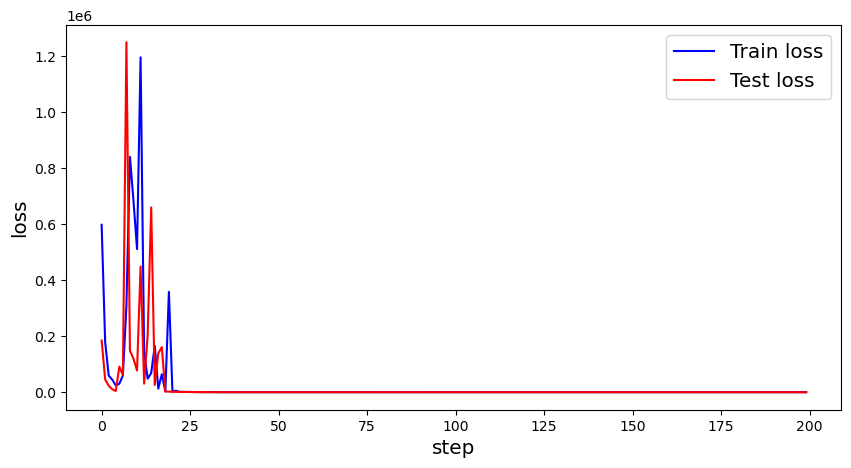

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
 
# plt.subplot(1, 2, 1)
train_steps = range(0,len(loss_train))
 
plt.plot(train_steps, loss_train, color='blue', label="Train loss")
plt.plot(train_steps, loss_test, color='red', label="Test loss")

plt.ylabel("loss", fontsize='x-large')
plt.xlabel("step", fontsize='x-large')
plt.legend(loc='upper right', fontsize='x-large')


plt.show()

In [32]:
os.chdir('/kaggle/working')
print(os.getcwd())
print(os.listdir("/kaggle/working"))
from IPython.display import FileLink
FileLink('best_model.pt')


/kaggle/working
['.virtual_documents', 'best_model.pt', 'kaggle']


/kaggle/working/best_model.pt